<a href="https://colab.research.google.com/github/Rekt77/kisa_insuretech/blob/master/kisa_insure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel("/content/drive/My Drive/insuretech/insurance/kisa_insurance.xlsx")

In [ ]:
df.head(15)

,고객번호,증권번호,피보험자성별명,피보험자연령,피보험자직업대분류명,피보험자직업중분류명,피보험자직업소분류명,피보험자직업세분류명,시도명,군구명,상품군명,상품명,담보분류유형명,장기담보군명,담보특약명
0,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해,상해후유장해,교통상해50%이상후유장해(1회한)
1,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,기타/인,비용기타,행정소송법률비용손해(실손)
2,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해,상해사망·후유장해,상해사망
3,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해,상해사망·후유장해,교통상해사망
4,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,기타/인,비용기타,법률비용손해(실손)
5,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,운전중손해,상해기타,자동차부상치료비(1~5급)
6,4,20024,남자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,도봉구,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,질병,질병기타,치주질환치료비(20년만기자동갱신)
7,4,20024,남자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,도봉구,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,질병,질병기타,특정치석제거(스케일링)치료비(20년만기자동갱신)
8,4,20024,남자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,도봉구,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,질병,질병기타,"치아치수치료비(상해및질병)(유치,영구치)(20년만기자동갱신)"
9,4,20024,남자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,도봉구,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,상해,질병기타,영구치보철치료비(상해및질병)(20년만기자동갱신)


In [ ]:
# info를 통해서 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103234 entries, 0 to 103233
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   고객번호        103234 non-null  int64 
 1   증권번호        103234 non-null  int64 
 2   피보험자성별명     103234 non-null  object
 3   피보험자연령      103234 non-null  int64 
 4   피보험자직업대분류명  103234 non-null  object
 5   피보험자직업중분류명  103234 non-null  object
 6   피보험자직업소분류명  103234 non-null  object
 7   피보험자직업세분류명  103234 non-null  object
 8   시도명         103234 non-null  object
 9   군구명         103234 non-null  object
 10  상품군명        103234 non-null  object
 11  상품명         103234 non-null  object
 12  담보분류유형명     101472 non-null  object
 13  장기담보군명      103234 non-null  object
 14  담보특약명       103234 non-null  object
dtypes: int64(3), object(12)
memory usage: 11.8+ MB


In [ ]:
# 블랭크를 NaN처리
def blank2Nan(x):
  if x==" ":
    return None
  else:
    return x
for col in df.columns:
  df[col] = df[col].apply(blank2Nan)

In [ ]:
# 결측치 재확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103234 entries, 0 to 103233
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   고객번호        103234 non-null  int64 
 1   증권번호        103234 non-null  int64 
 2   피보험자성별명     103234 non-null  object
 3   피보험자연령      103234 non-null  int64 
 4   피보험자직업대분류명  103234 non-null  object
 5   피보험자직업중분류명  70121 non-null   object
 6   피보험자직업소분류명  55146 non-null   object
 7   피보험자직업세분류명  45240 non-null   object
 8   시도명         103234 non-null  object
 9   군구명         103234 non-null  object
 10  상품군명        103234 non-null  object
 11  상품명         103234 non-null  object
 12  담보분류유형명     101472 non-null  object
 13  장기담보군명      103234 non-null  object
 14  담보특약명       103234 non-null  object
dtypes: int64(3), object(12)
memory usage: 11.8+ MB


In [ ]:
# 컬럼이름 변경
new_columns = ['c_idx','s_idx','sex','age','occupation','middle_div','small_div','sub_div','city','district','ins_cat','ins_name','gar_name','long_gar_cat','sp_term']
df.columns = new_columns
df.head()

,c_idx,s_idx,sex,age,occupation,middle_div,small_div,sub_div,city,district,ins_cat,ins_name,gar_name,long_gar_cat,sp_term
0,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해,상해후유장해,교통상해50%이상후유장해(1회한)
1,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,기타/인,비용기타,행정소송법률비용손해(실손)
2,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해,상해사망·후유장해,상해사망
3,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해,상해사망·후유장해,교통상해사망
4,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구","고등학생 및 주부, 무직",고등학생,고등학생,서울,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,기타/인,비용기타,법률비용손해(실손)


In [ ]:
# 데이터의 값을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103234 entries, 0 to 103233
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   c_idx         103234 non-null  int64 
 1   s_idx         103234 non-null  int64 
 2   sex           103234 non-null  object
 3   age           103234 non-null  int64 
 4   occupation    103234 non-null  object
 5   middle_div    70121 non-null   object
 6   small_div     55146 non-null   object
 7   sub_div       45240 non-null   object
 8   city          103234 non-null  object
 9   district      103234 non-null  object
 10  ins_cat       103234 non-null  object
 11  ins_name      103234 non-null  object
 12  gar_name      101472 non-null  object
 13  long_gar_cat  103234 non-null  object
 14  sp_term       103234 non-null  object
dtypes: int64(3), object(12)
memory usage: 11.8+ MB


In [ ]:
from collections import Counter

# occupation,age,sex를 추출
pop_job = df.loc[:,["occupation","age","sex"]]

# Counter에 occupation의 값 넣고 값 확인
# 직업별 출현횟수 딕셔너리로 리턴
# 단어:출현횟수
job_freq = Counter(pop_job["occupation"])

# 직업별 출현횟수를 키로 job_map을 제작
job_map = {k:i for i,k in enumerate(job_freq.keys())}

# 숫자로 치환된 직업 데이터가 저장된 oocupation_mapped를 생성
pop_job["occupation_mapped"] = pop_job["occupation"].replace(job_map)

# pop_job을 occupation_mapped를 기준으로 그루핑(인덱스화 x)
# count를 하면 직업(숫자)별 사람 수를 매핑 가능
pop_job_counts = pop_job.groupby("occupation_mapped",as_index=False).count().sort_values("occupation",ascending=False)


In [ ]:
pop_job_counts

# 1.Feature
 - long_gar_cat&sp_term
  - 보험 가입 시 증권번호가 생성되고 고객번호랑은 별개
  - 같은 고객이 여러개의 보험을 가입했을 경우가 있으므로 증권번호를 기준으로 데이터를 정제
  - 증권번호별 보험당 특약개수를 종합
  - long_gar & sp_term == drop

 - SEX
   - 남자 : 0
   - 여자 : 1


In [ ]:
# 장기담보, 담보명 제외
pop_col = ["c_idx","s_idx","sex","age","occupation","district","ins_cat","ins_name","gar_name"]
pop_df = df[pop_col]
pop_df

,c_idx,s_idx,sex,age,occupation,district,ins_cat,ins_name,gar_name
0,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해
1,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,기타/인
2,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해
3,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,상해
4,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,기타/인
...,...,...,...,...,...,...,...,...,...
103229,39951,9709,여자,1,"주부, 학생 및 기타 비경제활동인구",노원구,장기/상해,무배당 프로미라이프 실손의료비보험2001,건강
103230,39951,9709,여자,1,"주부, 학생 및 기타 비경제활동인구",노원구,장기/상해,무배당 프로미라이프 실손의료비보험2001,건강
103231,39951,9709,여자,1,"주부, 학생 및 기타 비경제활동인구",노원구,장기/상해,무배당 프로미라이프 실손의료비보험2001,건강
103232,39951,9709,여자,1,"주부, 학생 및 기타 비경제활동인구",노원구,장기/상해,무배당 프로미라이프 실손의료비보험2001,건강


In [ ]:
# 증권 번호를 불러와서 중복된 것들을 전부제거
# 각 데이터당 1개의 고유값만 남음
sidxs = df["s_idx"].drop_duplicates()

In [ ]:
sidxs

0         26394
6         20024
13        27841
37        16512
47        27840
          ...  
103177    46435
103198    46927
103207    44901
103216    46427
103225     9709
Name: s_idx, Length: 6313, dtype: int64

In [ ]:
# 중복되지 않은 증권번호를 이터레이팅
for sidx in sidxs:
  # row중에 sidx와 s_idx가 같은것을 고르고 그중에 gar_name에,
  # df["s_idx"]==sidx 마스크를 만족하는 row가 몇개인지 카운팅하여 삽입
  pop_df.loc[df["s_idx"]==sidx,"gar_name"] = int(len(pop_df[pop_df["s_idx"]==sidx]))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
pop_df

,c_idx,s_idx,sex,age,occupation,district,ins_cat,ins_name,gar_name
0,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
1,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
2,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
3,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
4,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
...,...,...,...,...,...,...,...,...,...
103229,39951,9709,여자,1,"주부, 학생 및 기타 비경제활동인구",노원구,장기/상해,무배당 프로미라이프 실손의료비보험2001,9
103230,39951,9709,여자,1,"주부, 학생 및 기타 비경제활동인구",노원구,장기/상해,무배당 프로미라이프 실손의료비보험2001,9
103231,39951,9709,여자,1,"주부, 학생 및 기타 비경제활동인구",노원구,장기/상해,무배당 프로미라이프 실손의료비보험2001,9
103232,39951,9709,여자,1,"주부, 학생 및 기타 비경제활동인구",노원구,장기/상해,무배당 프로미라이프 실손의료비보험2001,9


In [ ]:
# 중복된 행을 전부제거하고 고유 행만 남김
pop_df = pop_df.drop_duplicates()
pop_df.head()

,c_idx,s_idx,sex,age,occupation,district,ins_cat,ins_name,gar_name
0,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
6,4,20024,남자,21,"주부, 학생 및 기타 비경제활동인구",도봉구,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,7
13,8,27841,남자,21,"주부, 학생 및 기타 비경제활동인구",동대문구,장기/질병,무배당 프로미라이프 참좋은행복플러스+종합보험1911,24
37,15,16512,남자,20,"주부, 학생 및 기타 비경제활동인구",금천구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,10
47,21,27840,여자,18,"주부, 학생 및 기타 비경제활동인구",동대문구,장기/상해,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,23


In [ ]:
# 고객 한명이 최대 몇개의 보험을 들었는지
pivot = pd.crosstab(pop_df["c_idx"],pop_df["s_idx"]).sum(axis=1).sort_values(ascending=False)

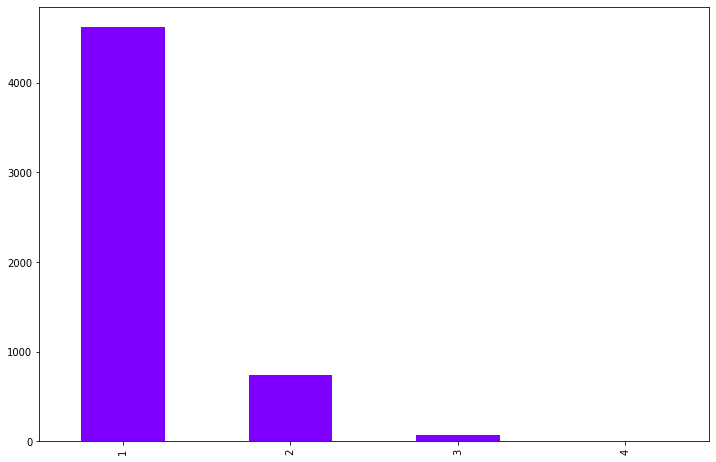

In [ ]:
pivot.value_counts().plot(kind='bar',
            stacked=True,
            colormap='rainbow',
            figsize=(12,8))

In [ ]:
# column name 변경
pop_df.columns = ["c_idx","s_idx","sex","age","occupation","gis","ins_cat","ins_name","gar_count"]
pop_df.head()

,c_idx,s_idx,sex,age,occupation,gis,ins_cat,ins_name,gar_count
0,2,26394,여자,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
6,4,20024,남자,21,"주부, 학생 및 기타 비경제활동인구",도봉구,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,7
13,8,27841,남자,21,"주부, 학생 및 기타 비경제활동인구",동대문구,장기/질병,무배당 프로미라이프 참좋은행복플러스+종합보험1911,24
37,15,16512,남자,20,"주부, 학생 및 기타 비경제활동인구",금천구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,10
47,21,27840,여자,18,"주부, 학생 및 기타 비경제활동인구",동대문구,장기/상해,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,23


In [ ]:
sex_map = {"남자":0,"여자":1}

pop_df["sex"] = pop_df["sex"].replace(sex_map)
pop_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,c_idx,s_idx,sex,age,occupation,gis,ins_cat,ins_name,gar_count
0,2,26394,1,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
6,4,20024,0,21,"주부, 학생 및 기타 비경제활동인구",도봉구,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,7
13,8,27841,0,21,"주부, 학생 및 기타 비경제활동인구",동대문구,장기/질병,무배당 프로미라이프 참좋은행복플러스+종합보험1911,24
37,15,16512,0,20,"주부, 학생 및 기타 비경제활동인구",금천구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,10
47,21,27840,1,18,"주부, 학생 및 기타 비경제활동인구",동대문구,장기/상해,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,23


In [ ]:
pop_df["age"]

0         21
6         21
13        21
37        20
47        18
          ..
103177    55
103198    27
103207    26
103216    38
103225     1
Name: age, Length: 6313, dtype: int64

In [ ]:
pop_df

,c_idx,s_idx,sex,age,occupation,gis,ins_cat,ins_name,gar_count
0,2,26394,1,21,"주부, 학생 및 기타 비경제활동인구",노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
6,4,20024,0,21,"주부, 학생 및 기타 비경제활동인구",도봉구,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,7
13,8,27841,0,21,"주부, 학생 및 기타 비경제활동인구",동대문구,장기/질병,무배당 프로미라이프 참좋은행복플러스+종합보험1911,24
37,15,16512,0,20,"주부, 학생 및 기타 비경제활동인구",금천구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,10
47,21,27840,1,18,"주부, 학생 및 기타 비경제활동인구",동대문구,장기/상해,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,23
...,...,...,...,...,...,...,...,...,...
103177,39931,46435,1,55,"교육, 의료, 종교, 문화예술, 스포츠, 사회복지 관련 분야",구로구,장기/운전자,무배당 프로미라이프 참좋은운전자보험(TM)1908,21
103198,39932,46927,1,27,"서비스 관련 분야 (음식, 숙박, 여행 등)",강남구,장기/상해,무배당 프로미라이프 다이렉트 실손의료비보험2001(CM),9
103207,39941,44901,0,26,"자연과학, 공학, 컴퓨터 및 통신 관련분야",마포구,장기/상해,무배당 프로미라이프 다이렉트 실손의료비보험2001(CM),9
103216,39950,46427,0,38,"행정, 금융, 사무관리,법률 관련 분야",금천구,장기/상해,무배당 프로미라이프 다이렉트 실손의료비보험2001(CM),9


In [ ]:
pop_df["occupation"].value_counts()

주부, 학생 및 기타 비경제활동인구                       1607
행정, 금융, 사무관리,법률 관련 분야                      912
교육, 의료, 종교, 문화예술, 스포츠, 사회복지 관련 분야          875
자연과학, 공학, 컴퓨터 및 통신 관련분야                    738
화학, 섬유, 식품, 설비 및 기타 제조 (기능, 생산직 관련 분야)     510
판매 관련 분야                                   475
서비스 관련 분야 (음식, 숙박, 여행 등)                   420
전기, 전자, 기계, 금속 (기능, 생산직 관련 분야)             386
농림어업, 광업, 축산업 관련 분야                        355
군인,경찰, 경호, 소방, 경비 관련 분야                     22
건설, 운송(기능직 관련분야)                            13
Name: occupation, dtype: int64

 - occupation
  - 직업 군
  - 상세직업(중,소,세)는 결측치가 너무 많고 대체값이 존재하지 않기 때문에 열 삭제
  --------------
   * 주부, 학생 및 기타 비경제활동인구': 0,
   * 자연과학, 공학, 컴퓨터 및 통신 관련분야': 1,
   * 서비스 관련 분야 (음식, 숙박, 여행 등)': 2,
   * 농림어업, 광업, 축산업 관련 분야': 3,
   * 교육, 의료, 종교, 문화예술, 스포츠, 사회복지 관련 분야': 4,
   * 화학, 섬유, 식품, 설비 및 기타 제조 (기능, 생산직 관련 분야)': 5
   * 행정, 금융, 사무관리,법률 관련 분야': 6,
   * 전기, 전자, 기계, 금속 (기능, 생산직 관련 분야)': 7,
   * 판매 관련 분야': 8,
   * 건설, 운송(기능직 관련분야)': 9,
   * 군인,경찰, 경호, 소방, 경비 관련 분야': 10,
   
   

In [ ]:
import collections

bow = collections.Counter(pop_df['occupation'])


In [ ]:
bow

Counter({'건설, 운송(기능직 관련분야)': 13,
         '교육, 의료, 종교, 문화예술, 스포츠, 사회복지 관련 분야': 875,
         '군인,경찰, 경호, 소방, 경비 관련 분야': 22,
         '농림어업, 광업, 축산업 관련 분야': 355,
         '서비스 관련 분야 (음식, 숙박, 여행 등)': 420,
         '자연과학, 공학, 컴퓨터 및 통신 관련분야': 738,
         '전기, 전자, 기계, 금속 (기능, 생산직 관련 분야)': 386,
         '주부, 학생 및 기타 비경제활동인구': 1607,
         '판매 관련 분야': 475,
         '행정, 금융, 사무관리,법률 관련 분야': 912,
         '화학, 섬유, 식품, 설비 및 기타 제조 (기능, 생산직 관련 분야)': 510})

In [ ]:
occp_map

{'건설, 운송(기능직 관련분야)': 9,
 '교육, 의료, 종교, 문화예술, 스포츠, 사회복지 관련 분야': 4,
 '군인,경찰, 경호, 소방, 경비 관련 분야': 10,
 '농림어업, 광업, 축산업 관련 분야': 3,
 '서비스 관련 분야 (음식, 숙박, 여행 등)': 2,
 '자연과학, 공학, 컴퓨터 및 통신 관련분야': 1,
 '전기, 전자, 기계, 금속 (기능, 생산직 관련 분야)': 7,
 '주부, 학생 및 기타 비경제활동인구': 0,
 '판매 관련 분야': 8,
 '행정, 금융, 사무관리,법률 관련 분야': 6,
 '화학, 섬유, 식품, 설비 및 기타 제조 (기능, 생산직 관련 분야)': 5}

In [ ]:
# 1번
occp_map = { k:i for i,k in enumerate(bow.keys()) }

# 2번
#occp_map = dict(zip(bow.keys(),np.linspace(0,1,11)))
pop_df['occupation'] = pop_df['occupation'].replace(occp_map)
pop_df.head(6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,c_idx,s_idx,sex,age,occupation,gis,ins_cat,ins_name,gar_count
0,2,26394,1,21,0,노원구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
6,4,20024,0,21,0,도봉구,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,7
13,8,27841,0,21,0,동대문구,장기/질병,무배당 프로미라이프 참좋은행복플러스+종합보험1911,24
37,15,16512,0,20,0,금천구,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,10
47,21,27840,1,18,0,동대문구,장기/상해,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,23
70,25,14177,0,16,0,구로구,장기/상해,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,37


In [ ]:
# 직업을 기준으로 데이터 재구성
# count 함수로 직업군별 사람 수를 구할 수 있음
oc_count=pop_df.groupby("occupation",as_index=False).count()

oc_count

,occupation,c_idx,s_idx,sex,age,gis,ins_cat,ins_name,gar_count
0,0,1607,1607,1607,1607,1607,1607,1607,1607
1,1,738,738,738,738,738,738,738,738
2,2,420,420,420,420,420,420,420,420
3,3,355,355,355,355,355,355,355,355
4,4,875,875,875,875,875,875,875,875
5,5,510,510,510,510,510,510,510,510
6,6,912,912,912,912,912,912,912,912
7,7,386,386,386,386,386,386,386,386
8,8,475,475,475,475,475,475,475,475
9,9,13,13,13,13,13,13,13,13


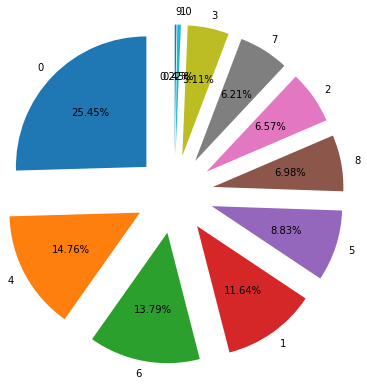

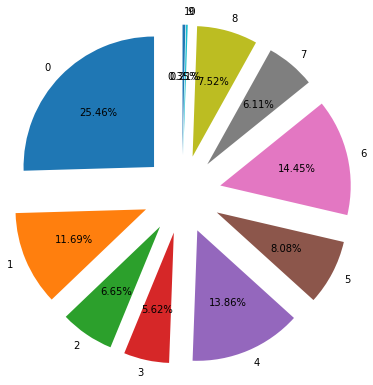

In [ ]:
# 정제 전
plt.figure(figsize=(10,6))
plt.pie(
    x="occupation",
    data=pop_job_counts,
    labels=pop_job_counts["occupation_mapped"],
    autopct='%1.2f%%', # second decimal place
    startangle=90,
    explode=[0.3 for _ in range(11)]
)
plt.show()

# 정제 후
plt.figure(figsize=(10,6))
plt.pie(
    x="c_idx",
    data=oc_count,
    labels=oc_count["occupation"],
    autopct='%1.2f%%', # second decimal place
    startangle=90,
    explode=[0.3 for _ in range(11)]
)
plt.show()

In [ ]:
pop_df["gar_count"] = pop_df["gar_count"].astype(str).astype(int)
pop_df.groupby("occupation").sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,c_idx,s_idx,sex,age,gar_count
occupation,,,,,
0,32212333,39132622,1138,65675,26272
1,17567914,17081783,349,32532,12018
2,8080187,9831023,227,20662,6783
3,6495311,8426606,103,19719,5280
4,20367695,20328558,427,37235,15233
5,8126186,11979962,25,28336,9113
6,17305707,20861718,272,44868,14238
7,7935149,8853387,51,20008,6411
8,10813002,11237158,288,23023,7204


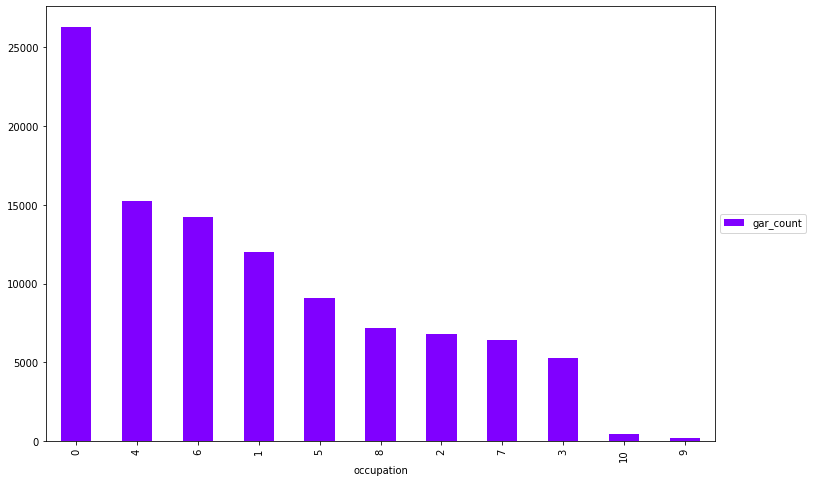

In [ ]:
# 직업군별 특약 개수
# gar_count 형변환 object->int64
pop_df["gar_count"] = pop_df["gar_count"].astype(str).astype(int)
pop_df.groupby("occupation").sum()["gar_count"].sort_values(ascending=False).plot(
    kind='bar',
    stacked=True,
    colormap='rainbow',
    figsize=(12,8)).legend(loc='center left',
    bbox_to_anchor=(1, 0.5)
)

<BarContainer object of 11 artists>

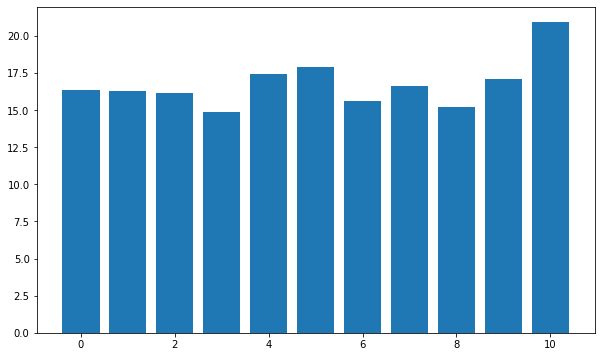

In [ ]:
# 각 직업군별 1인당 특약 개수
rat=pop_df.groupby("occupation").sum()["gar_count"]/pop_df["occupation"].value_counts()
fig = plt.figure(figsize=(10,6))
plt.bar(rat.index,rat)

- age
 - child, young, adult, mid-age, senior 로 구분
 - child -> 고등학생 이전(~16세)
 - young -> 대학교졸업(17~26세)
 - adult -> 사회초년생 -> 과장급(27~36세)
 - mid-age -> 예상 은퇴 나이(37~57세)
 - senior -> 퇴직이후(58세~)

In [ ]:
age_map = {'child':0,'young':1,'adult':2,'mid-age':3,'senior':4}
pop_df.loc[df["age"] <= 16, 'age'] = 0
pop_df.loc[(pop_df["age"] > 16) & (pop_df["age"] <= 26), 'age'] = 1
pop_df.loc[(df["age"] > 26) & (pop_df["age"] <= 36), 'age'] = 2
pop_df.loc[(df["age"] > 36) & (pop_df["age"] <= 57), 'age'] = 3
pop_df.loc[(df["age"] > 57),'age'] = 4

pop_df["age"].value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


3    2468
4    1887
2    1173
1     538
0     247
Name: age, dtype: int64


# https://data.seoul.go.kr/dataList/11043/S/2/datasetView.do

- city-district
 - 전부 서울에 살고 있으므로 city는 제외
 - 사는 지역에서 차별점이 있는 변수는 자본수준(gis로 측정)
 - 자본수준과 보험 특약을 들 수 있는 능력과 관계가 있다고 판단
 - district를 gdp//100000한 값으로 대체
 - MinMax scaler를 통해서 0~5 사이의 값으로 스케일링

In [ ]:
with open("/content/drive/My Drive/insuretech/insurance/report.txt","r") as f:
  rows = f.read().split("\n")
city_gdp_map = {each.split("\t")[1]:int(each.split("\t")[2].replace(",",""))//100000 for each in rows[1:]}
pop_df["gis"] = pop_df["gis"].replace(city_gdp_map)
pop_df.head(10)

,c_idx,s_idx,sex,age,occupation,gis,ins_cat,ins_name,gar_count
0,2,26394,1,1,0,52,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,6
6,4,20024,0,1,0,28,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,7
13,8,27841,0,1,0,71,장기/질병,무배당 프로미라이프 참좋은행복플러스+종합보험1911,24
37,15,16512,0,1,0,150,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,10
47,21,27840,1,1,0,71,장기/상해,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,23
70,25,14177,0,0,0,119,장기/상해,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,37
107,41,17679,0,4,0,277,장기/질병,무배당 프로미라이프 참좋은간편건강보험1906_TM,10
117,44,17112,0,4,1,107,장기/상해,무배당 프로미라이프 스마트가정보장보험1904,1
118,45,41013,0,4,2,52,장기/상해,무배당 프로미라이프 실손의료비보험(계약전환용)2001,6
124,47,14953,0,4,3,107,장기/운전자,무배당 프로미라이프 참좋은운전자보험(TM)1908,13


In [ ]:
city_gdp_map

{'강남구': 599,
 '강동구': 74,
 '강북구': 28,
 '강서구': 107,
 '관악구': 53,
 '광진구': 59,
 '구로구': 119,
 '금천구': 150,
 '노원구': 52,
 '도봉구': 28,
 '동대문구': 71,
 '동작구': 51,
 '마포구': 163,
 '서대문구': 74,
 '서울시': 3594,
 '서초구': 294,
 '성동구': 105,
 '성북구': 52,
 '송파구': 220,
 '양천구': 60,
 '영등포구': 277,
 '용산구': 103,
 '은평구': 39,
 '종로구': 280,
 '중구': 486,
 '중랑구': 40}

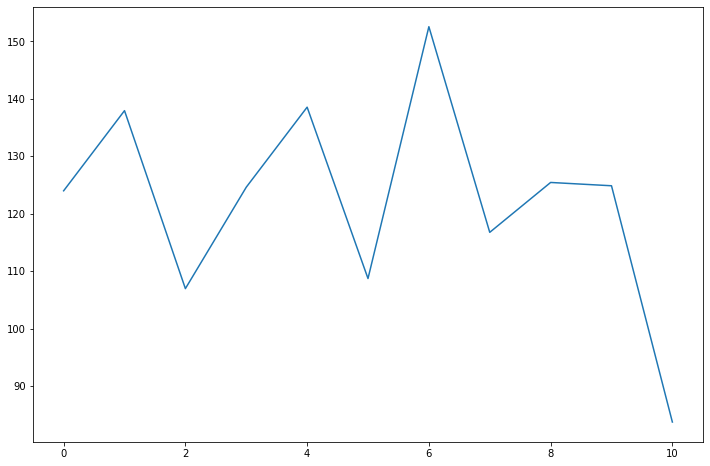

In [ ]:
#직업 별 자본 수준
oc_gis=pop_df.groupby("occupation",as_index=False).mean()[["occupation","gis"]]
oc_gis.head(11)
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(oc_gis["occupation"],oc_gis["gis"])

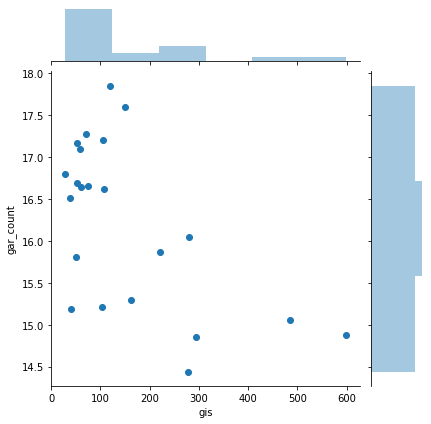

In [ ]:
# 지역구별 특약 가입 개수
gar_gis=pop_df.groupby("gis",as_index=False).mean()[["gar_count","gis"]]
gar_gis
sns.jointplot(gar_gis["gis"],gar_gis["gar_count"])

In [ ]:
gar_gis

,gar_count,gis
0,12.0,28
1,13.0,39
2,10.0,40
3,9.0,51
4,12.0,52
5,12.0,53
6,13.0,59
7,12.0,60
8,13.0,71
9,13.0,74


In [ ]:
#Min-Max scaler 정의
MAX = pop_df["gis"].max()
MIN = pop_df["gis"].min()
denom = MAX-MIN

def scaler(denom,min,x):
    return (x - min) / denom

pop_df["gis"] = pop_df["gis"].apply(lambda x: scaler(denom,MIN,x))

# 정규화 결과확인
pop_df["gis"].value_counts()

MAX = pop_df["gar_count"].max()
MIN = pop_df["gar_count"].min()
denom = MAX-MIN

pop_df["gar_count"] = pop_df["gar_count"].apply(lambda x: scaler(denom,MIN,x))

# 정규화 결과확인
pop_df["gar_count"].value_counts()

0.069565    1348
0.017391     243
0.026087     240
0.000000     183
0.121739     179
            ... 
0.617391       1
0.878261       1
0.773913       1
1.000000       1
0.973913       1
Name: gar_count, Length: 88, dtype: int64

In [ ]:
pop_df["gis"].value_counts()

0.042032    618
0.000000    517
0.080560    475
0.138354    438
0.043783    353
0.159370    337
0.336252    336
0.021016    330
0.056042    326
0.436077    287
1.000000    280
0.019264    278
0.075306    242
0.213660    219
0.040280    219
0.236427    210
0.054291    199
0.465849    178
0.134851    159
0.131349    118
0.441331    101
0.802102     93
Name: gis, dtype: int64

In [ ]:
pop_df.head()

,c_idx,s_idx,sex,age,occupation,gis,ins_cat,ins_name,gar_count
0,2,26394,1,1,0,0.042032,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,0.043478
6,4,20024,0,1,0,0.000000,장기/질병,무배당 프로미라이프 참좋은치아사랑보험1904,0.052174
13,8,27841,0,1,0,0.075306,장기/질병,무배당 프로미라이프 참좋은행복플러스+종합보험1911,0.200000
37,15,16512,0,1,0,0.213660,장기/운전자,무배당 프로미라이프 참좋은운전자+보험1908,0.078261
47,21,27840,1,1,0,0.075306,장기/상해,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,0.191304


- ins_cat

In [ ]:
pop_df["ins_cat"].value_counts()

# linspace를 통해서 데이터 매핑
#1번
ins_cat_map = dict(zip(["장기/질병","장기/운전자","장기/상해","장기/재물","장기/저축"],np.linspace(0,1,5)))

#2번
#ins_cat_map = dict(zip(["장기/질병","장기/운전자","장기/상해","장기/재물","장기/저축"],np.linspace(0,1,5)))
pop_df["ins_cat"] = pop_df["ins_cat"].replace(ins_cat_map)
pop_df["ins_cat"].value_counts()

0.50    2097
0.00    2072
0.25    1960
0.75     179
1.00       5
Name: ins_cat, dtype: int64

- ins_name
 - 총 56개의 보험중 상위 10개 제외 나머지 삭제

In [ ]:
#isin메소드로 마스크제작
#각 보험별 수를 종합해서 랭킹 10위만 추출
pop_df = pop_df.loc[pop_df["ins_name"].isin(pop_df["ins_name"].value_counts().index[:10])]

In [ ]:
pop_df

,c_idx,s_idx,sex,age,occupation,gis,ins_cat,ins_name,gar_count
0,2,26394,1,1,0,0.042032,0.25,무배당 프로미라이프 참좋은운전자+보험1908,0.043478
6,4,20024,0,1,0,0.000000,0.00,무배당 프로미라이프 참좋은치아사랑보험1904,0.052174
13,8,27841,0,1,0,0.075306,0.00,무배당 프로미라이프 참좋은행복플러스+종합보험1911,0.200000
37,15,16512,0,1,0,0.213660,0.25,무배당 프로미라이프 참좋은운전자+보험1908,0.078261
47,21,27840,1,1,0,0.075306,0.50,무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001,0.191304
...,...,...,...,...,...,...,...,...,...
103137,39914,41392,1,0,0,0.021016,0.50,무배당 프로미라이프 실손의료비보험2001,0.069565
103147,39929,43614,0,1,0,0.080560,0.50,무배당 프로미라이프 실손의료비보험2001,0.069565
103156,39930,46077,0,3,7,0.134851,0.25,무배당 프로미라이프 참좋은운전자+보험1908,0.173913
103177,39931,46435,1,3,4,0.159370,0.25,무배당 프로미라이프 참좋은운전자보험(TM)1908,0.173913


In [ ]:
pop_df.groupby("occupation").mean()

,c_idx,s_idx,sex,age,gis,ins_cat,gar_count
occupation,,,,,,,
0,20546.411588,24485.534236,0.691497,2.152746,0.168645,0.307938,0.147126
1,23802.611864,22724.915254,0.489831,2.779661,0.189308,0.246186,0.149742
2,19426.485795,23245.957386,0.556818,2.985795,0.133005,0.236506,0.145232
3,19191.111524,23543.148699,0.275093,3.304833,0.168966,0.227695,0.136027
4,23323.248588,22984.168079,0.490113,2.677966,0.187833,0.245410,0.158659
5,16098.453540,23597.148230,0.042035,3.353982,0.137978,0.229535,0.157791
6,19565.894595,22909.290541,0.290541,3.009459,0.214195,0.236486,0.143572
7,21045.535604,23233.987616,0.120743,3.176471,0.155265,0.207430,0.152618
8,23184.524194,24046.451613,0.618280,2.943548,0.164906,0.242608,0.143104


In [ ]:
# 질병,운전자,상해가 비슷한 특약 양상을 보임
pivot = pd.crosstab(pop_df["ins_cat"],pop_df["gar_count"]).sum(axis=1)
pivot

ins_cat
0.00    1582
0.25    1901
0.50    1683
dtype: int64

- randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
pop_df = shuffle(pop_df)
data = pop_df.drop(['c_idx','s_idx','ins_name'], axis=1)
label = pop_df["ins_name"]

train_data, test_data, train_label, test_label = train_test_split(data,label)

train_data.to_excel("/content/drive/My Drive/insuretech/train_data.xlsx")
test_data.to_excel("/content/drive/My Drive/insuretech/test_data.xlsx")

train_label.to_excel("/content/drive/My Drive/insuretech/train_label.xlsx")
test_label.to_excel("/content/drive/My Drive/insuretech/test_label.xlsx")


In [ ]:
test_data.head()
#pd.crosstab(pop_df["age"],pop_df["ins_cat"])

,sex,age,occupation,gis,ins_cat,gar_count
5959,0,0,0,0.043783,0.5,0.052174
13194,1,4,8,0.042032,0.0,0.130435
56209,1,3,2,0.236427,0.0,0.165217
93763,0,4,7,0.213660,0.0,0.113043
35519,1,3,8,0.042032,0.0,0.130435


In [ ]:
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_data,train_label)
pre = clf.predict(test_data)
report = metrics.classification_report(pre,test_label)
print(report)

                                  precision    recall  f1-score   support

        무배당 프로미라이프 스마트가정보장보험1904       0.89      0.78      0.83        69
   무배당 프로미라이프 실손의료비보험(계약전환용)2001       0.38      0.36      0.37        33
          무배당 프로미라이프 실손의료비보험2001       0.89      0.91      0.90       229
무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001       0.91      0.95      0.93        94
  무배당 프로미라이프 참좋은 훼밀리플러스+종합보험1911       0.36      0.42      0.39        97
        무배당 프로미라이프 참좋은간편건강보험1906       0.64      0.71      0.67       120
        무배당 프로미라이프 참좋은운전자+보험1908       0.88      0.81      0.84       391
     무배당 프로미라이프 참좋은운전자보험(TM)1908       0.26      0.37      0.30        70
        무배당 프로미라이프 참좋은치아사랑보험1904       0.48      0.42      0.45        31
    무배당 프로미라이프 참좋은행복플러스+종합보험1911       0.53      0.44      0.48       158

                        accuracy                           0.71      1292
                       macro avg       0.62      0.62      0.62      1292
                    weighted avg    

In [ ]:
import pickle

with open("randomforest_checkpoint_100.p","wb") as p:
  pickle.dump(clf,p)

with open("randomforest_checkpoint_100.p","rb") as p:
  clf = pickle.load(p)

pre = clf.predict(test_data)
report = metrics.classification_report(pre,test_label)
print(report)

                                  precision    recall  f1-score   support

        무배당 프로미라이프 스마트가정보장보험1904       0.89      0.78      0.83        69
   무배당 프로미라이프 실손의료비보험(계약전환용)2001       0.38      0.36      0.37        33
          무배당 프로미라이프 실손의료비보험2001       0.89      0.91      0.90       229
무배당 프로미라이프 아이(I)러브(LOVE)건강보험2001       0.91      0.95      0.93        94
  무배당 프로미라이프 참좋은 훼밀리플러스+종합보험1911       0.36      0.42      0.39        97
        무배당 프로미라이프 참좋은간편건강보험1906       0.64      0.71      0.67       120
        무배당 프로미라이프 참좋은운전자+보험1908       0.88      0.81      0.84       391
     무배당 프로미라이프 참좋은운전자보험(TM)1908       0.26      0.37      0.30        70
        무배당 프로미라이프 참좋은치아사랑보험1904       0.48      0.42      0.45        31
    무배당 프로미라이프 참좋은행복플러스+종합보험1911       0.53      0.44      0.48       158

                        accuracy                           0.71      1292
                       macro avg       0.62      0.62      0.62      1292
                    weighted avg    